<a href="https://colab.research.google.com/github/IMPERIAL-xY/datascience-sachin-/blob/main/Logistic_Regression_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim : Logistic Regression and Decision Tree
* Build a logistic regression model to predict a binary outcome.
* Evaluate the model's performance using classification metrics (e.g., accuracy, precision, recall).
* Construct a decision tree model and interpret the decision rules for classification.

## **Logistic Regression**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, roc_curve, auc)

In [ ]:
# Load the Heart dataset
df = pd.read_csv('Heart.csv')

# Drop the ID column 'Unnamed: 0' and any rows with missing values
df = df.drop(['Unnamed: 0'], axis=1, errors='ignore')
df = df.dropna()

print("Data loaded. Shape:", df.shape)
df.head()

Data loaded. Shape: (297, 14)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
# 1. Convert Target 'AHD' to 0 and 1 (Yes=1, No=0)
df['AHD'] = df['AHD'].map({'Yes': 1, 'No': 0})

# 2. Encode categorical features 'ChestPain' and 'Thal'
# We use get_dummies (One-Hot Encoding) for Logistic Regression
df_encoded = pd.get_dummies(df, columns=['ChestPain', 'Thal'], drop_first=True)

print("Columns after encoding:")
print(df_encoded.columns)

Columns after encoding:
Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'AHD', 'ChestPain_nonanginal',
       'ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal',
       'Thal_reversable'],
      dtype='object')


In [ ]:
# X = All columns except the target 'AHD'
# y = The target 'AHD'
X = df_encoded.drop('AHD', axis=1)
y = df_encoded['AHD']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (297, 16)
Target shape: (297,)


In [ ]:
# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (237, 16)
Testing set: (60, 16)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
print("Logistic Regression Model Trained.")

Logistic Regression Model Trained.


In [ ]:
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy  :", round(accuracy, 4))
print("Precision :", round(precision, 4))
print("Recall    :", round(recall, 4))
print("F1-score  :", round(f1, 4))

Accuracy  : 0.8667
Precision : 0.8846
Recall    : 0.8214
F1-score  : 0.8519


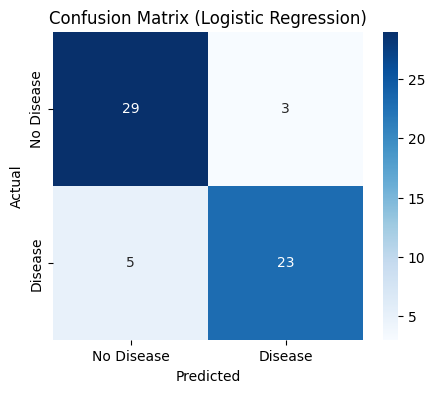

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

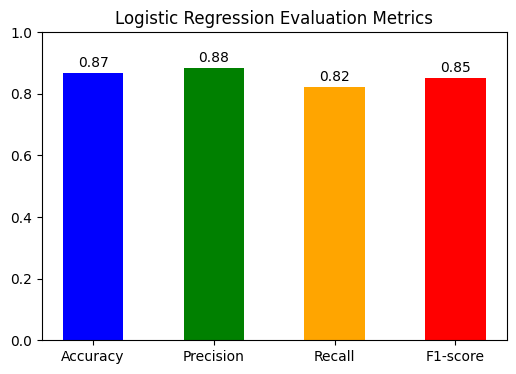

In [ ]:
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics_list, values, width=0.5, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title("Logistic Regression Evaluation Metrics")
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

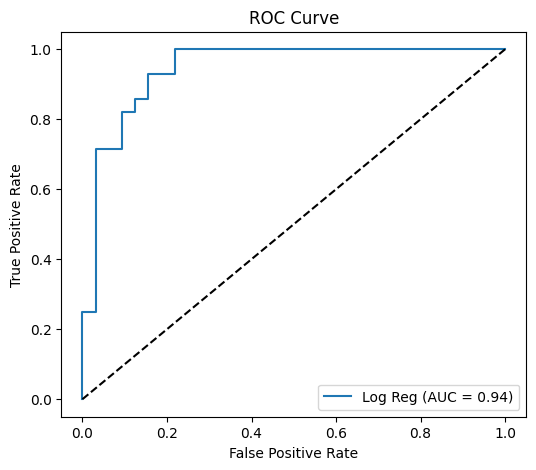

In [ ]:
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Log Reg (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

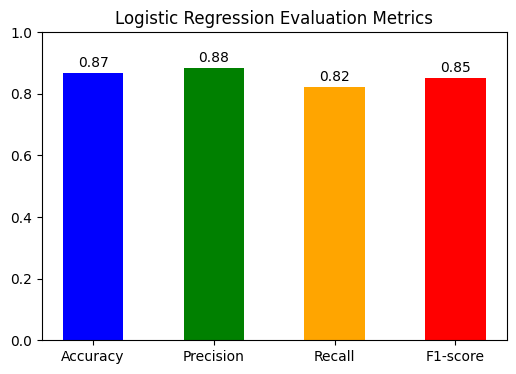

In [ ]:
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics_list, values, width=0.5, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title("Logistic Regression Evaluation Metrics")
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

## **Decision Tree**

Initial Tree Accuracy: 76.67%
Best alpha found: 0.01594 with Accuracy: 86.67%

Classification Report (Pruned Tree):
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.90      0.75      0.82        24

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60



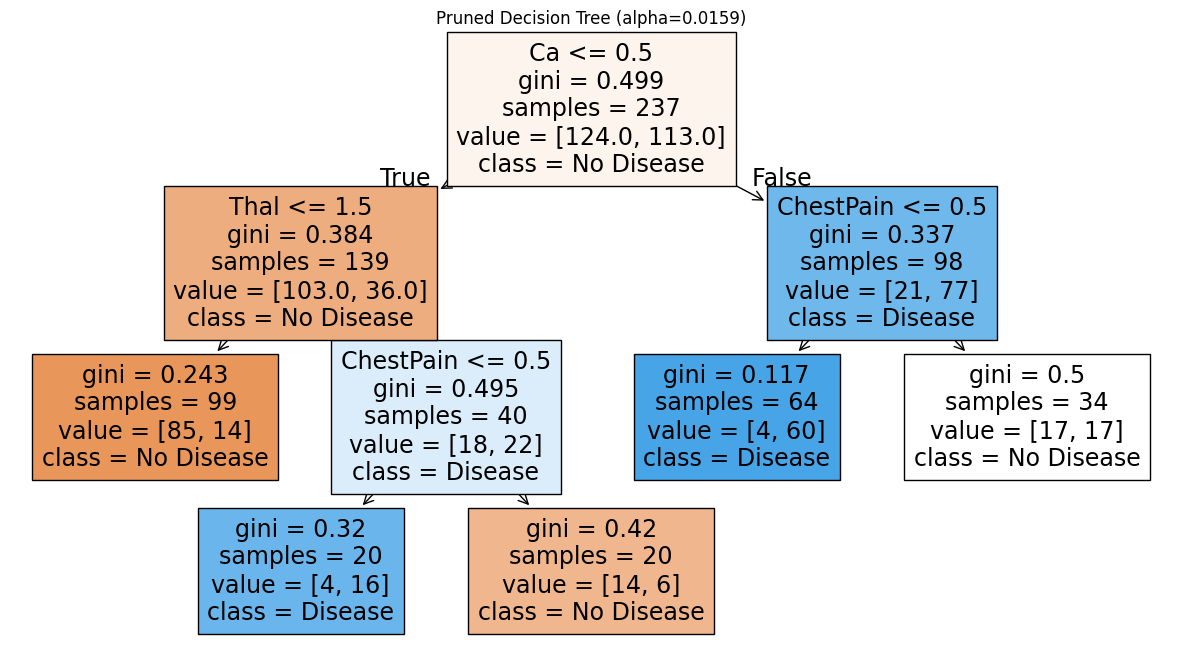

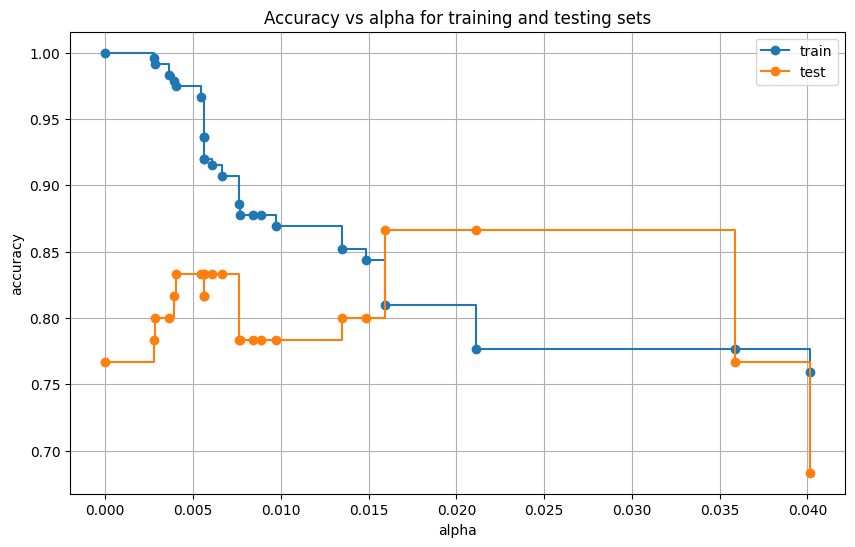

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load and Clean Data
df = pd.read_csv('Heart.csv')

# Drop ID column and missing values
df = df.drop(['Unnamed: 0'], axis=1, errors='ignore')
df = df.dropna()

# 2. Label Encoding (Convert text to numbers)
# Decision Trees work well with Label Encoding
le = LabelEncoder()
for col in ['ChestPain', 'Thal', 'AHD']:
    df[col] = le.fit_transform(df[col])

# 3. Define Features (X) and Target (y)
X = df.drop('AHD', axis=1)
y = df['AHD']

# 4. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Initial (Unpruned) Tree
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
clf.fit(X_train, y_train)

print(f"Initial Tree Accuracy: {accuracy_score(y_test, clf.predict(X_test))*100:.2f}%")

# 6. Cost Complexity Pruning Path
# Calculate effective alphas for pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1] # Exclude the last alpha (which removes the whole tree)

# 7. Train a Tree for Each Alpha to Find the Best One
clfs = []
for ccp_alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_temp.fit(X_train, y_train)
    clfs.append(clf_temp)

# Get scores for all trees
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Automatically select the alpha with the highest test accuracy
best_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_index]
print(f"Best alpha found: {best_alpha:.5f} with Accuracy: {test_scores[best_index]*100:.2f}%")

# 8. Train the Final Pruned Tree
clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)

# 9. Evaluate the Final Model
pred_pruned = clf_pruned.predict(X_test)
print("\nClassification Report (Pruned Tree):")
print(classification_report(y_test, pred_pruned))

# 10. Visualize the Pruned Tree
plt.figure(figsize=(15, 8))
tree.plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title(f"Pruned Decision Tree (alpha={best_alpha:.4f})")
plt.show()

# Optional: Plot Accuracy vs Alpha to see the pruning effect
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.legend()
plt.grid()
plt.show()